In [87]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
from dotenv import load_dotenv

import os
import json

load_dotenv()

dataset_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023' / 'training_data' /  'quadrant_enumeration'
model_dir = Path(os.getenv('YOLO_MODEL_DIR')) 


In [5]:
model = YOLO(model_dir / '32-bound-v8.pt')
model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
results = model(dataset_dir / 'xrays')



image 1/634 /Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/training_data/quadrant_enumeration/xrays/train_0.png: 288x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 50.3ms
image 2/634 /Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/training_data/quadrant_enumeration/xrays/train_1.png: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 51.7ms
image 3/634 /Users/lucyxu/PycharmProjects/datasets/DENTEX CHALLENGE 2023/training_data/quadrant_enumeration/xrays/train_10.png: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 53.5ms
im

# Convert result to coco json format

In [28]:
# with open('../../datasets/COCO/instances_train2017.json') as f:
with open(dataset_dir / 'train_quadrant_enumeration.json') as f:
     gt_json = json.load(f)

image_id_dict = {image['file_name']: image['id'] for image in gt_json['images']}
image_id_dict


{'train_283.png': 1,
 'train_435.png': 2,
 'train_95.png': 3,
 'train_475.png': 4,
 'train_62.png': 5,
 'train_187.png': 6,
 'train_509.png': 7,
 'train_31.png': 8,
 'train_498.png': 9,
 'train_264.png': 10,
 'train_581.png': 11,
 'train_458.png': 12,
 'train_12.png': 13,
 'train_564.png': 14,
 'train_559.png': 15,
 'train_324.png': 16,
 'train_136.png': 17,
 'train_305.png': 18,
 'train_348.png': 19,
 'train_251.png': 20,
 'train_176.png': 21,
 'train_621.png': 22,
 'train_453.png': 23,
 'train_289.png': 24,
 'train_229.png': 25,
 'train_499.png': 26,
 'train_290.png': 27,
 'train_254.png': 28,
 'train_271.png': 29,
 'train_440.png': 30,
 'train_61.png': 31,
 'train_41.png': 32,
 'train_383.png': 33,
 'train_536.png': 34,
 'train_209.png': 35,
 'train_7.png': 36,
 'train_54.png': 37,
 'train_233.png': 38,
 'train_568.png': 39,
 'train_493.png': 40,
 'train_311.png': 41,
 'train_225.png': 42,
 'train_482.png': 43,
 'train_487.png': 44,
 'train_3.png': 45,
 'train_0.png': 46,
 'train_29

In [82]:
from itertools import product

predict_json = {}

i = 0
annotations = []
for result in results:
    for box in result.boxes:
        i += 1
        bbox = box.xywh.squeeze().tolist()
        annotation = {
            'id': i,
            'image_id': image_id_dict[Path(result.path).name],
            'category_id': int(box.cls.squeeze()),
            'score': float(box.conf),
            'bbox': bbox,
            'area': 20000,
        }
        annotations.append(annotation)

tooth_type_dict = {
    1: 'incisor',
    2: 'incisor',
    3: 'canines',
    4: 'premolar',
    5: 'premolar',
    6: 'molar',
    7: 'molar',
    8: 'molar',
}
categories = {j: {'supercategory': tooth_type_dict[j[0]], 'id': i, 'name': ''.join(map(str, j))} for i, j in enumerate(product(range(1, 5), range(1, 9)))}

predict_json['info'] = 'Dentex 2023'
predict_json['licenses'] = 'licenses'
predict_json['images'] = gt_json['images']
predict_json['annotations'] = annotations
predict_json['categories'] = list(categories.values()) 


In [83]:
with open('det_temp.json', 'w') as f:
    json.dump(predict_json, f)


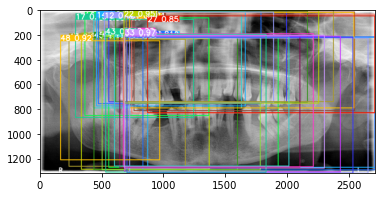

In [88]:
for i in results:
    if 'train_283.png' in i.path:
        break
        
a = i.plot()

plt.imshow(a)
plt.show()
